## 1. Introduction

> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.


Nama : Hana

Batch : FTDS-021-RMT

Objective : Menurut laporan FIFA 2022 (link artikel), jumlah pemain sepak bola pada tahun 2021 kurang lebih sebanyak 130.000 pemain. namun dalam dataset ini hanya tersedia 20.000 pemain saja. Project kali ini bertujuan untuk memprediksi rating pemain FIFA 2022 sehingga semua pemain sepak bola profesional dapat diketahui ratingnya dan tidak menutup kempungkinan akan muncul talenta/wonderkid baru.

Akan model machine learning menggunakan linear regression dan dinilai performansinya menggunakan metriks akurasi.

buat sedetail mungkin

## 2. Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
#Import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


## 3. Data Loading

>Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.



In [2]:
#Data Loading

data = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w1/P1W1D1PM%20-%20Machine%20Learning%20Problem%20Framing.csv')
data

,Name,Age,Height,Weight,ValueEUR,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Overall
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65,93
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82,92
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75,91
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77,91
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53,48
19256,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44,48
19257,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56,48
19258,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51,48


In [3]:
#Duplicate dataset

data_duplicate = data.copy()

In [4]:
#Rename column

data.rename(columns = {'ValueEUR' : 'Price', 'Overall' : 'Rating'}, inplace = True)
data

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65,93
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82,92
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75,91
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77,91
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53,48
19256,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44,48
19257,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56,48
19258,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51,48


In [5]:
#check dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19260 entries, 0 to 19259
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               19260 non-null  object
 1   Age                19260 non-null  int64 
 2   Height             19260 non-null  int64 
 3   Weight             19260 non-null  int64 
 4   Price              19260 non-null  int64 
 5   AttackingWorkRate  19260 non-null  object
 6   DefensiveWorkRate  19260 non-null  object
 7   PaceTotal          19260 non-null  int64 
 8   ShootingTotal      19260 non-null  int64 
 9   PassingTotal       19260 non-null  int64 
 10  DribblingTotal     19260 non-null  int64 
 11  DefendingTotal     19260 non-null  int64 
 12  PhysicalityTotal   19260 non-null  int64 
 13  Rating             19260 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 2.1+ MB


kasih statement ....

- Pada dataset ini terdapat 14 kolom dengan masing-masing tipe data terdiri object (3 kolom) dan integer (11 kolom)

- Terlihat tidak terdapat missing value karena jumlah entri data lengkap

In [6]:
# cek basic statistic

data.describe()

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
count,19260.000000,19260.000000,19260.000000,1.926000e+04,19260.000000,19260.000000,19260.000000,19260.000000,19260.0000,19260.000000,19260.000000
mean,25.184683,181.305036,74.950779,2.857652e+06,67.910228,53.535514,57.853323,63.028712,50.0581,64.676584,65.815628
std,4.737340,6.866151,7.066864,7.604532e+06,10.656453,13.813476,9.835494,9.704853,16.3888,9.626269,6.817297
min,16.000000,155.000000,49.000000,0.000000e+00,28.000000,18.000000,25.000000,26.000000,14.0000,29.000000,48.000000
25%,21.000000,176.000000,70.000000,4.750000e+05,62.000000,44.000000,52.000000,58.000000,35.0000,58.000000,62.000000
50%,25.000000,181.000000,75.000000,9.750000e+05,68.000000,56.000000,58.000000,64.000000,54.0000,66.000000,66.000000
75%,29.000000,186.000000,80.000000,2.000000e+06,75.000000,64.000000,65.000000,69.000000,63.0000,72.000000,70.000000
max,54.000000,206.000000,110.000000,1.940000e+08,97.000000,94.000000,93.000000,95.000000,91.0000,92.000000,93.000000


- kasih statement jugaa

## 4. Exploratary Data Analysis (EDA)

>Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.


GC & milestone > 5-7

LC > 3-5

Akan dilihat persebaran rating pada dataset ini dan juga proporsi antara tinggi dan berat badan pemain

<function matplotlib.pyplot.show(close=None, block=None)>

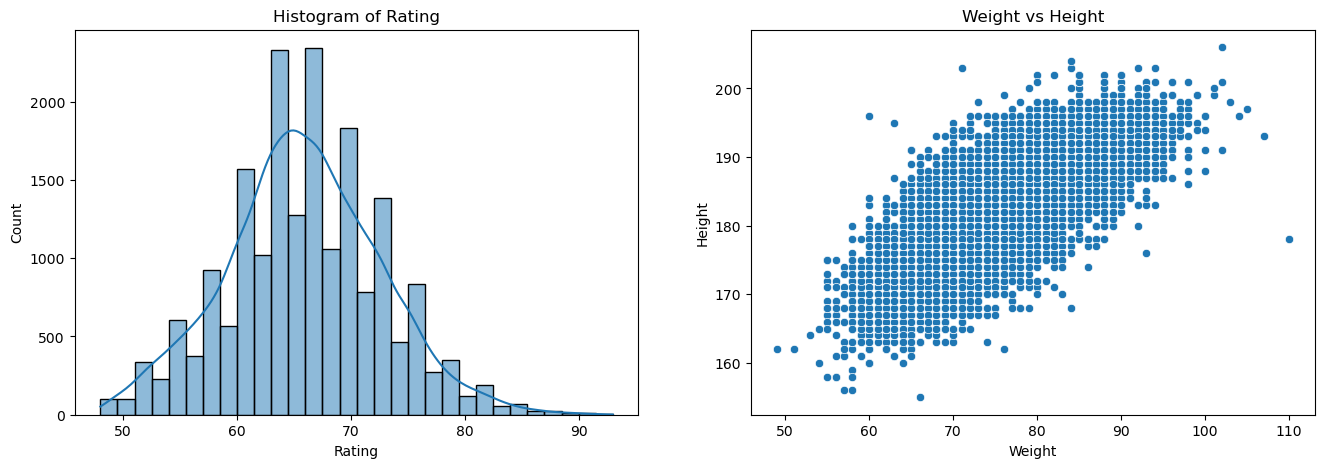

In [7]:
#create hidtogram and scatter plot

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(data['Rating'], kde=True, bins = 30)
plt.title('Histogram of Rating')

plt.subplot(1,2,2)
sns.scatterplot(x = 'Weight', y = 'Height', data = data)
plt.title('Weight vs Height')
plt.show

statement??

- Terlihat dari plot rating dari histogram, rating terdistribusi normal dengan rata-rata 65
- Proporsi antara berat dan tinggi seimbang

## 5. Feature Engineering (TANPA PIPELINE)

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.



### Split between X (features) and y (Target)

In [8]:
##Splitting between X and y

X = data.drop(['Rating'], axis = 1)
y = data['Rating']
X

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53
19256,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44
19257,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56
19258,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51


### Split between Train-set and Test-set


In [9]:
#Splitting between train set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 17)
#70: 30
#80: 20

print('Train size : ', X_train.shape)
print('Test size : ', X_test.shape)
X_train


Train size :  (15408, 13)
Test size :  (3852, 13)


,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
946,Petros,32,181,77,8500000,High,High,68,68,72,75,73,83
5988,Janio Bikel,26,174,70,1700000,Low,High,70,43,56,69,66,73
13232,J. Powell,27,177,62,550000,Medium,Medium,62,57,63,64,54,66
1042,M. Faraoni,29,180,71,9500000,High,High,74,71,73,74,71,76
10193,N. Hagglund,28,185,87,625000,Medium,High,50,29,56,52,63,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9529,S. López,32,178,72,675000,High,Medium,67,61,67,68,50,60
406,Everton,25,174,72,28000000,High,Low,86,75,73,86,32,62
13702,S. Guibert,32,188,82,250000,Medium,Medium,41,47,51,53,61,70
2191,Beto,23,194,88,8500000,High,Medium,71,74,54,68,24,78


### Handle Outlier

> akan dijelaskan pada pertemuan seleasa, 25 juli 2023

### Handle Missing Value

> akan dijelaskan pada pertemuan selasa, 25 juli 2023

In [10]:
#Check Mising value on X_train

X_train.isnull().sum()

Name                 0
Age                  0
Height               0
Weight               0
Price                0
AttackingWorkRate    0
DefensiveWorkRate    0
PaceTotal            0
ShootingTotal        0
PassingTotal         0
DribblingTotal       0
DefendingTotal       0
PhysicalityTotal     0
dtype: int64

Tidak terdapat misisng value di data train

In [11]:
#Check misisng value on X_test

X_test.isnull().sum()

Name                 0
Age                  0
Height               0
Weight               0
Price                0
AttackingWorkRate    0
DefensiveWorkRate    0
PaceTotal            0
ShootingTotal        0
PassingTotal         0
DribblingTotal       0
DefendingTotal       0
PhysicalityTotal     0
dtype: int64

Tidak terdapat missing value di test set

In [12]:
#Check missing values on y train

y_train.isnull().sum()

0

Tidak terdapat missing value data target train

In [13]:
#check missing value on y_test

y_test.isnull().sum()

0

Tidak terdapat missing value di y test

Tidak terdapat missing value di dataset ini

### Feature Selection


- pearson, spearman, anova, chi square

In [14]:
X_train

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
946,Petros,32,181,77,8500000,High,High,68,68,72,75,73,83
5988,Janio Bikel,26,174,70,1700000,Low,High,70,43,56,69,66,73
13232,J. Powell,27,177,62,550000,Medium,Medium,62,57,63,64,54,66
1042,M. Faraoni,29,180,71,9500000,High,High,74,71,73,74,71,76
10193,N. Hagglund,28,185,87,625000,Medium,High,50,29,56,52,63,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9529,S. López,32,178,72,675000,High,Medium,67,61,67,68,50,60
406,Everton,25,174,72,28000000,High,Low,86,75,73,86,32,62
13702,S. Guibert,32,188,82,250000,Medium,Medium,41,47,51,53,61,70
2191,Beto,23,194,88,8500000,High,Medium,71,74,54,68,24,78


Berdasarkan personal judgement, tidak ada kaitannya anatara column `Name` dengan column `rating`. Hal ini dibuktikan dengan nama `Theo Ronaldo` tidak ada kaitannya dengan nama sehebat `Christiano ronaldo` sehingga rating pun tidak akan berbeda

In [15]:
#Drop column `Name`

X_train.drop('Name', axis = 1, inplace = True)
X_test.drop('Name', axis = 1, inplace = True)
X_train

,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
946,32,181,77,8500000,High,High,68,68,72,75,73,83
5988,26,174,70,1700000,Low,High,70,43,56,69,66,73
13232,27,177,62,550000,Medium,Medium,62,57,63,64,54,66
1042,29,180,71,9500000,High,High,74,71,73,74,71,76
10193,28,185,87,625000,Medium,High,50,29,56,52,63,67
...,...,...,...,...,...,...,...,...,...,...,...,...
9529,32,178,72,675000,High,Medium,67,61,67,68,50,60
406,25,174,72,28000000,High,Low,86,75,73,86,32,62
13702,32,188,82,250000,Medium,Medium,41,47,51,53,61,70
2191,23,194,88,8500000,High,Medium,71,74,54,68,24,78


Pada feature selection ini, akan dipakai kolom-kolom sebagai berikut:
- Age
- Height

### Split between Numeric Columns and Category Columns

In [16]:
#get numeric columns and categorical columns

num_columns = X_train.select_dtypes(include = np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include = ['object']).columns.tolist()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['Age', 'Height', 'Weight', 'Price', 'PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal']
Cat Columns :  ['AttackingWorkRate', 'DefensiveWorkRate']


Kolom yang merupakan numerical adalah kolom age, height, wigh

kolom yang merupakan categorical adalah

kolom numerical akan selnajutnya dilakukan scaling dan categorical akan dilakukan encoding

In [17]:
#Split train set and test set based on column types

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
946,32,181,77,8500000,68,68,72,75,73,83
5988,26,174,70,1700000,70,43,56,69,66,73
13232,27,177,62,550000,62,57,63,64,54,66
1042,29,180,71,9500000,74,71,73,74,71,76
10193,28,185,87,625000,50,29,56,52,63,67
...,...,...,...,...,...,...,...,...,...,...
9529,32,178,72,675000,67,61,67,68,50,60
406,25,174,72,28000000,86,75,73,86,32,62
13702,32,188,82,250000,41,47,51,53,61,70
2191,23,194,88,8500000,71,74,54,68,24,78


### Feature Scaling



---

Akan di scaling menggunakan min max scaler karena bla bla

In [18]:
X_train_num.describe()

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
count,15408.000000,15408.000000,15408.000000,1.540800e+04,15408.000000,15408.000000,15408.000000,15408.000000,15408.000000,15408.000000
mean,25.201648,181.311721,74.975532,2.863765e+06,67.921989,53.634151,57.890057,63.078855,50.017458,64.690550
std,4.722922,6.882654,7.091461,7.535592e+06,10.651541,13.798000,9.794095,9.662102,16.423356,9.633306
min,16.000000,155.000000,49.000000,0.000000e+00,28.000000,18.000000,25.000000,26.000000,14.000000,29.000000
25%,21.000000,176.000000,70.000000,4.750000e+05,62.000000,44.000000,52.000000,58.000000,35.000000,58.000000
50%,25.000000,181.000000,75.000000,9.750000e+05,68.000000,56.000000,58.000000,64.000000,54.000000,66.000000
75%,29.000000,186.000000,80.000000,2.000000e+06,75.000000,64.000000,65.000000,69.000000,63.000000,72.000000
max,54.000000,206.000000,110.000000,1.940000e+08,97.000000,94.000000,93.000000,92.000000,91.000000,92.000000


In [19]:
#Feature scaling using MinmaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num)
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.42105263, 0.50980392, 0.45901639, ..., 0.74242424, 0.76623377,
        0.85714286],
       [0.26315789, 0.37254902, 0.3442623 , ..., 0.65151515, 0.67532468,
        0.6984127 ],
       [0.28947368, 0.43137255, 0.21311475, ..., 0.57575758, 0.51948052,
        0.58730159],
       ...,
       [0.42105263, 0.64705882, 0.54098361, ..., 0.40909091, 0.61038961,
        0.65079365],
       [0.18421053, 0.76470588, 0.63934426, ..., 0.63636364, 0.12987013,
        0.77777778],
       [0.15789474, 0.54901961, 0.47540984, ..., 0.56060606, 0.16883117,
        0.42857143]])

### Feature Encoding

jelaskan kenapa pilih teknik encoding tersebut

akan digunakan ordinal encoder karena data yang kita punya berbentuk ordinal

In [20]:
X_train_cat

,AttackingWorkRate,DefensiveWorkRate
946,High,High
5988,Low,High
13232,Medium,Medium
1042,High,High
10193,Medium,High
...,...,...
9529,High,Medium
406,High,Low
13702,Medium,Medium
2191,High,Medium


In [21]:
# Feature encoding using ordinal encoder

from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories = [['Low', 'Medium', 'High'],
                                       ['Low', 'Medium', 'High']])
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)
X_train_cat_encoded

array([[2., 2.],
       [0., 2.],
       [1., 1.],
       ...,
       [1., 1.],
       [2., 1.],
       [1., 1.]])

### Concate Between Numeric Columns and Categorical Columns

In [22]:
# Concate columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis = 1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis = 1)
X_train_final

array([[0.42105263, 0.50980392, 0.45901639, ..., 0.85714286, 2.        ,
        2.        ],
       [0.26315789, 0.37254902, 0.3442623 , ..., 0.6984127 , 0.        ,
        2.        ],
       [0.28947368, 0.43137255, 0.21311475, ..., 0.58730159, 1.        ,
        1.        ],
       ...,
       [0.42105263, 0.64705882, 0.54098361, ..., 0.65079365, 1.        ,
        1.        ],
       [0.18421053, 0.76470588, 0.63934426, ..., 0.77777778, 2.        ,
        1.        ],
       [0.15789474, 0.54901961, 0.47540984, ..., 0.42857143, 1.        ,
        1.        ]])

In [23]:
#Create dataframe of X_train_final

X_train_final_df = pd.DataFrame(X_train_final, columns = [num_columns + cat_columns])
X_train_final_df

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,AttackingWorkRate,DefensiveWorkRate
0,0.421053,0.509804,0.459016,0.043814,0.579710,0.657895,0.691176,0.742424,0.766234,0.857143,2.0,2.0
1,0.263158,0.372549,0.344262,0.008763,0.608696,0.328947,0.455882,0.651515,0.675325,0.698413,0.0,2.0
2,0.289474,0.431373,0.213115,0.002835,0.492754,0.513158,0.558824,0.575758,0.519481,0.587302,1.0,1.0
3,0.342105,0.490196,0.360656,0.048969,0.666667,0.697368,0.705882,0.727273,0.740260,0.746032,2.0,2.0
4,0.315789,0.588235,0.622951,0.003222,0.318841,0.144737,0.455882,0.393939,0.636364,0.603175,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15403,0.421053,0.450980,0.377049,0.003479,0.565217,0.565789,0.617647,0.636364,0.467532,0.492063,2.0,1.0
15404,0.236842,0.372549,0.377049,0.144330,0.840580,0.750000,0.705882,0.909091,0.233766,0.523810,2.0,0.0
15405,0.421053,0.647059,0.540984,0.001289,0.188406,0.381579,0.382353,0.409091,0.610390,0.650794,1.0,1.0
15406,0.184211,0.764706,0.639344,0.043814,0.623188,0.736842,0.426471,0.636364,0.129870,0.777778,2.0,1.0


## 5. FE (DENGAN PIPELINE)

In [24]:
##Splitting between X and y

X = data.drop(['Rating'], axis = 1)
y = data['Rating']
X

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53
19256,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44
19257,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56
19258,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51


In [25]:
#Splitting between train set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 17)
#70: 30
#80: 20

print('Train size : ', X_train.shape)
print('Test size : ', X_test.shape)
X_train

Train size :  (15408, 13)
Test size :  (3852, 13)


,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
946,Petros,32,181,77,8500000,High,High,68,68,72,75,73,83
5988,Janio Bikel,26,174,70,1700000,Low,High,70,43,56,69,66,73
13232,J. Powell,27,177,62,550000,Medium,Medium,62,57,63,64,54,66
1042,M. Faraoni,29,180,71,9500000,High,High,74,71,73,74,71,76
10193,N. Hagglund,28,185,87,625000,Medium,High,50,29,56,52,63,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9529,S. López,32,178,72,675000,High,Medium,67,61,67,68,50,60
406,Everton,25,174,72,28000000,High,Low,86,75,73,86,32,62
13702,S. Guibert,32,188,82,250000,Medium,Medium,41,47,51,53,61,70
2191,Beto,23,194,88,8500000,High,Medium,71,74,54,68,24,78


### Missing value

In [26]:
print(X_train.isna().sum())
print(y_train.isna().sum())
print(X_test.isna().sum())
print(y_test.isna().sum())

Name                 0
Age                  0
Height               0
Weight               0
Price                0
AttackingWorkRate    0
DefensiveWorkRate    0
PaceTotal            0
ShootingTotal        0
PassingTotal         0
DribblingTotal       0
DefendingTotal       0
PhysicalityTotal     0
dtype: int64
0
Name                 0
Age                  0
Height               0
Weight               0
Price                0
AttackingWorkRate    0
DefensiveWorkRate    0
PaceTotal            0
ShootingTotal        0
PassingTotal         0
DribblingTotal       0
DefendingTotal       0
PhysicalityTotal     0
dtype: int64
0


## cek outlier

## Feature Selection

jelaskan pakai metode apa terus apa aja fitur yang mau digunakan misal dengan cek korelasi

In [30]:
# hasil feature selection
features = ['Price', 'PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 
            'DefendingTotal', 'PhysicalityTotal', 'AttackingWorkRate', 'DefensiveWorkRate']

In [31]:
#get numeric columns and categorical columns

num_columns = X_train[features].select_dtypes(include = np.number).columns.tolist()
cat_columns = X_train[features].select_dtypes(include = ['object']).columns.tolist()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['Price', 'PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal']
Cat Columns :  ['AttackingWorkRate', 'DefensiveWorkRate']


## Pipeline Building

In [36]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [34]:
from sklearn.pipeline import Pipeline, make_pipeline

In [37]:
# Objek transformasi
# missing value handling
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# scaler
scaler = MinMaxScaler()
s_scaler = StandardScaler()

# encoding
encoder = OrdinalEncoder(categories = [['Low', 'Medium', 'High'],
                                       ['Low', 'Medium', 'High']])

In [41]:
# make_pipeline
num_pipe1 = make_pipeline(num_imputer, scaler)
cat_pipe1 = make_pipeline(cat_imputer, encoder)

In [43]:
# Pipeline
# numerical
num_pipe2 = Pipeline([('imputasi', num_imputer),
                     ('scaling', scaler)])

# categorical
cat_pipe2 = Pipeline([('imputasi', cat_imputer),
                     ('encoding', encoder)])

In [46]:
from sklearn.compose import ColumnTransformer

In [50]:
# columntransformer
transformer = ColumnTransformer([('numerical', num_pipe2, num_columns),
                                 ('categorical', cat_pipe2, cat_columns)],
                                 remainder = 'drop')

transformer

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('imputasi',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling', MinMaxScaler())]),
                                 ['Price', 'PaceTotal', 'ShootingTotal',
                                  'PassingTotal', 'DribblingTotal',
                                  'DefendingTotal', 'PhysicalityTotal']),
                                ('categorical',
                                 Pipeline(steps=[('imputasi',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Low',
                                                                              'Medium',
                                                                              'High']]))]),
                                 ['AttackingWorkRate', 'DefensiveWorkRate'])])

In [52]:
# fit
transformer.fit(X_train)

# transform (gak perlu kalau mau disatukan dengan model)
X_train_final = transformer.transform(X_train)
X_test_final = transformer.transform(X_test)

In [54]:
X_train_final

array([[4.38144330e-02, 5.79710145e-01, 6.57894737e-01, ...,
        8.57142857e-01, 2.00000000e+00, 2.00000000e+00],
       [8.76288660e-03, 6.08695652e-01, 3.28947368e-01, ...,
        6.98412698e-01, 0.00000000e+00, 2.00000000e+00],
       [2.83505155e-03, 4.92753623e-01, 5.13157895e-01, ...,
        5.87301587e-01, 1.00000000e+00, 1.00000000e+00],
       ...,
       [1.28865979e-03, 1.88405797e-01, 3.81578947e-01, ...,
        6.50793651e-01, 1.00000000e+00, 1.00000000e+00],
       [4.38144330e-02, 6.23188406e-01, 7.36842105e-01, ...,
        7.77777778e-01, 2.00000000e+00, 1.00000000e+00],
       [8.24742268e-03, 5.07246377e-01, 6.31578947e-01, ...,
        4.28571429e-01, 1.00000000e+00, 1.00000000e+00]])

## Build Preprocessing Pipeline

## numerical columns

for numerical columns we would use MinMaxScaler because blablabla...

## 6. Model Definition

>Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.


- algoritma yang dipakai adalah linear regression karen akita metrics akan diguunakan adalah MAE karena abla bla

In [55]:
##Trainig using Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

model_lin_reg = LinearRegression()
rf_regressor = RandomForestRegressor()

In [58]:
# include model in pipeline

rf_pipe = Pipeline([('feature_engineering', transformer),
                    ('rf', rf_regressor)])

lr_pipe = Pipeline([('feature_engineering', transformer),
                    ('lr', model_lin_reg)])

rf_pipe

Pipeline(steps=[('feature_engineering',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  ['Price', 'PaceTotal',
                                                   'ShootingTotal',
                                                   'PassingTotal',
                                                   'DribblingTotal',
                                                   'DefendingTotal',
                                                   'PhysicalityTotal']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Low',
                                                                                               'Medium',
                                                                                               'High']]))]),
                                                  ['AttackingWorkRate',
                                                   'DefensiveWorkRate'])])),
                ('rf', RandomForestRegressor())])

## 7. Model Training

>Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.



In [59]:
from sklearn.model_selection import cross_val_score

## Cross Validation

In [61]:

cross_val_rf = cross_val_score(rf_pipe,
                                X_train,
                                y_train,
                                cv=3,
                                scoring="neg_mean_absolute_error")

cross_val_lr = cross_val_score(lr_pipe,
                                X_train,
                                y_train,
                                cv=3,
                                scoring="neg_mean_absolute_error")

In [64]:
print(cross_val_lr.mean())
print(cross_val_rf.mean())

-2.4233366490063015
-0.8502771287642784


## Hyperparam Tuning

In [67]:
# Search Params

rf_params = {'rf__n_estimators': [200, 300, 400],
 'rf__max_depth': [10, 450, 560],
 'rf__min_samples_split': [2, 5],
 'rf__min_samples_leaf': [1, 6, 8]}

# RandomSearch
# Hyperparameter Tuning : Random Search
from sklearn.model_selection import RandomizedSearchCV

random_rf = RandomizedSearchCV(rf_pipe, 
                               param_distributions= rf_params,
                               n_iter = 10,
                               cv=5,
                                random_state=46,
                                n_jobs=-1,
                                scoring='neg_mean_absolute_error')

In [68]:
random_rf.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('feature_engineering',
                                              ColumnTransformer(transformers=[('numerical',
                                                                               Pipeline(steps=[('imputasi',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaling',
                                                                                                MinMaxScaler())]),
                                                                               ['Price',
                                                                                'PaceTotal',
                                                                                'ShootingTotal',
                                                                                'PassingTotal',
                                                                                'DribblingTotal',
                                                                                'DefendingTotal',
                                                                                'PhysicalityTotal']),
                                                                              ('categorical',
                                                                               Pipeline(steps=[('i...
                                                                                                OrdinalEncoder(categories=[['Low',
                                                                                                                            'Medium',
                                                                                                                            'High'],
                                                                                                                           ['Low',
                                                                                                                            'Medium',
                                                                                                                            'High']]))]),
                                                                               ['AttackingWorkRate',
                                                                                'DefensiveWorkRate'])])),
                                             ('rf', RandomForestRegressor())]),
                   n_jobs=-1,
                   param_distributions={'rf__max_depth': [10, 450, 560],
                                        'rf__min_samples_leaf': [1, 6, 8],
                                        'rf__min_samples_split': [2, 5],
                                        'rf__n_estimators': [200, 300, 400]},
                   random_state=46, scoring='neg_mean_absolute_error')

In [71]:
# melihat hyperparameter
random_rf.best_params_

{'rf__n_estimators': 200,
 'rf__min_samples_split': 5,
 'rf__min_samples_leaf': 1,
 'rf__max_depth': 450}

In [73]:
# memanggil objek yang sudah pakai best estimator
best_rf = random_rf.best_estimator_
best_rf

Pipeline(steps=[('feature_engineering',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  ['Price', 'PaceTotal',
                                                   'ShootingTotal',
                                                   'PassingTotal',
                                                   'DribblingTotal',
                                                   'DefendingTotal',
                                                   'PhysicalityTotal']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Low',
                                                                                               'Medium',
                                                                                               'High']]))]),
                                                  ['AttackingWorkRate',
                                                   'DefensiveWorkRate'])])),
                ('rf',
                 RandomForestRegressor(max_depth=450, min_samples_split=5,
                                       n_estimators=200))])

In [74]:
#Train the model

best_rf.fit(X_train, y_train)

Pipeline(steps=[('feature_engineering',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  ['Price', 'PaceTotal',
                                                   'ShootingTotal',
                                                   'PassingTotal',
                                                   'DribblingTotal',
                                                   'DefendingTotal',
                                                   'PhysicalityTotal']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Low',
                                                                                               'Medium',
                                                                                               'High']]))]),
                                                  ['AttackingWorkRate',
                                                   'DefensiveWorkRate'])])),
                ('rf',
                 RandomForestRegressor(max_depth=450, min_samples_split=5,
                                       n_estimators=200))])

## 8. Model Evaluation

>Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.



In [76]:
# Predict Train-set and Test-set

y_pred_train = best_rf.predict(X_train)
y_pred_test = best_rf.predict(X_test)
y_pred_train

array([76.42108929, 68.48016468, 63.06059163, ..., 62.18765675,
       74.09144048, 65.20028373])

In [ ]:
#Display y_train

y_train

946      77
5988     69
13232    63
1042     77
10193    65
         ..
9529     66
406      80
13702    62
2191     74
10863    65
Name: Rating, Length: 15408, dtype: int64

In [77]:
#Model evaluation using MAE

from sklearn.metrics import mean_absolute_error

print('Error - Train set : ', mean_absolute_error(y_train, y_pred_train))
print('Error - Test set : ', mean_absolute_error(y_test, y_pred_test))

Error - Train set :  0.36529060874008334
Error - Test set :  0.8224835161017012


Statement??

1. nyatakan apakah model tergolong goodfit, overfit, underfit
2. narasikan hasl bisnis
- jika messi mempunyai ratning 93 maka model akan memprediksi kisaran 91.5 - 95.5, menurut bisnis kira2
3. eksplorasi data aktual dengan data prediksi

## 9. Model Saving

>Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model.



In [79]:
#Save the files

import pickle
import json


with open('model.pkl', 'wb') as file_5:
  pickle.dump(best_rf, file_5)

## 10. kesimpulan
>Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

EDA, model evaluation, model analysis, further improvement

buat kesimpulan dalam paragraf yang concise dan compact